In [25]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn import metrics
import pandas as pd
import numpy as np
import seaborn as sns
# import warnings 
# warnings.filterwarnings("ignore")
from ucimlrepo import fetch_ucirepo 


# Задание №1

### Загрузить таблицу Mushroom в объект DataFrame.


In [26]:
mushroom = fetch_ucirepo(id=73) 
  
X = mushroom.data.features 
Y = mushroom.data.targets 

df_mushroom = pd.DataFrame(X.join(Y))
CLASSES = list(df_mushroom['poisonous'].unique())
df_mushroom = df_mushroom.dropna()
df_mushroom

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,b,y,n,f,n,f,c,b,w,e,...,n,n,p,w,t,p,w,y,p,e
8001,x,y,n,f,n,f,c,b,w,e,...,n,n,p,w,t,p,w,y,p,e
8038,x,y,g,t,n,f,c,b,w,e,...,w,w,p,w,t,p,w,y,p,e
8095,x,y,c,f,m,f,c,b,y,e,...,c,c,p,w,n,n,w,c,d,p


### Вычислить распределение значений категориальных признаков по классам (использовать pd.groupby). Визуализировать распределения

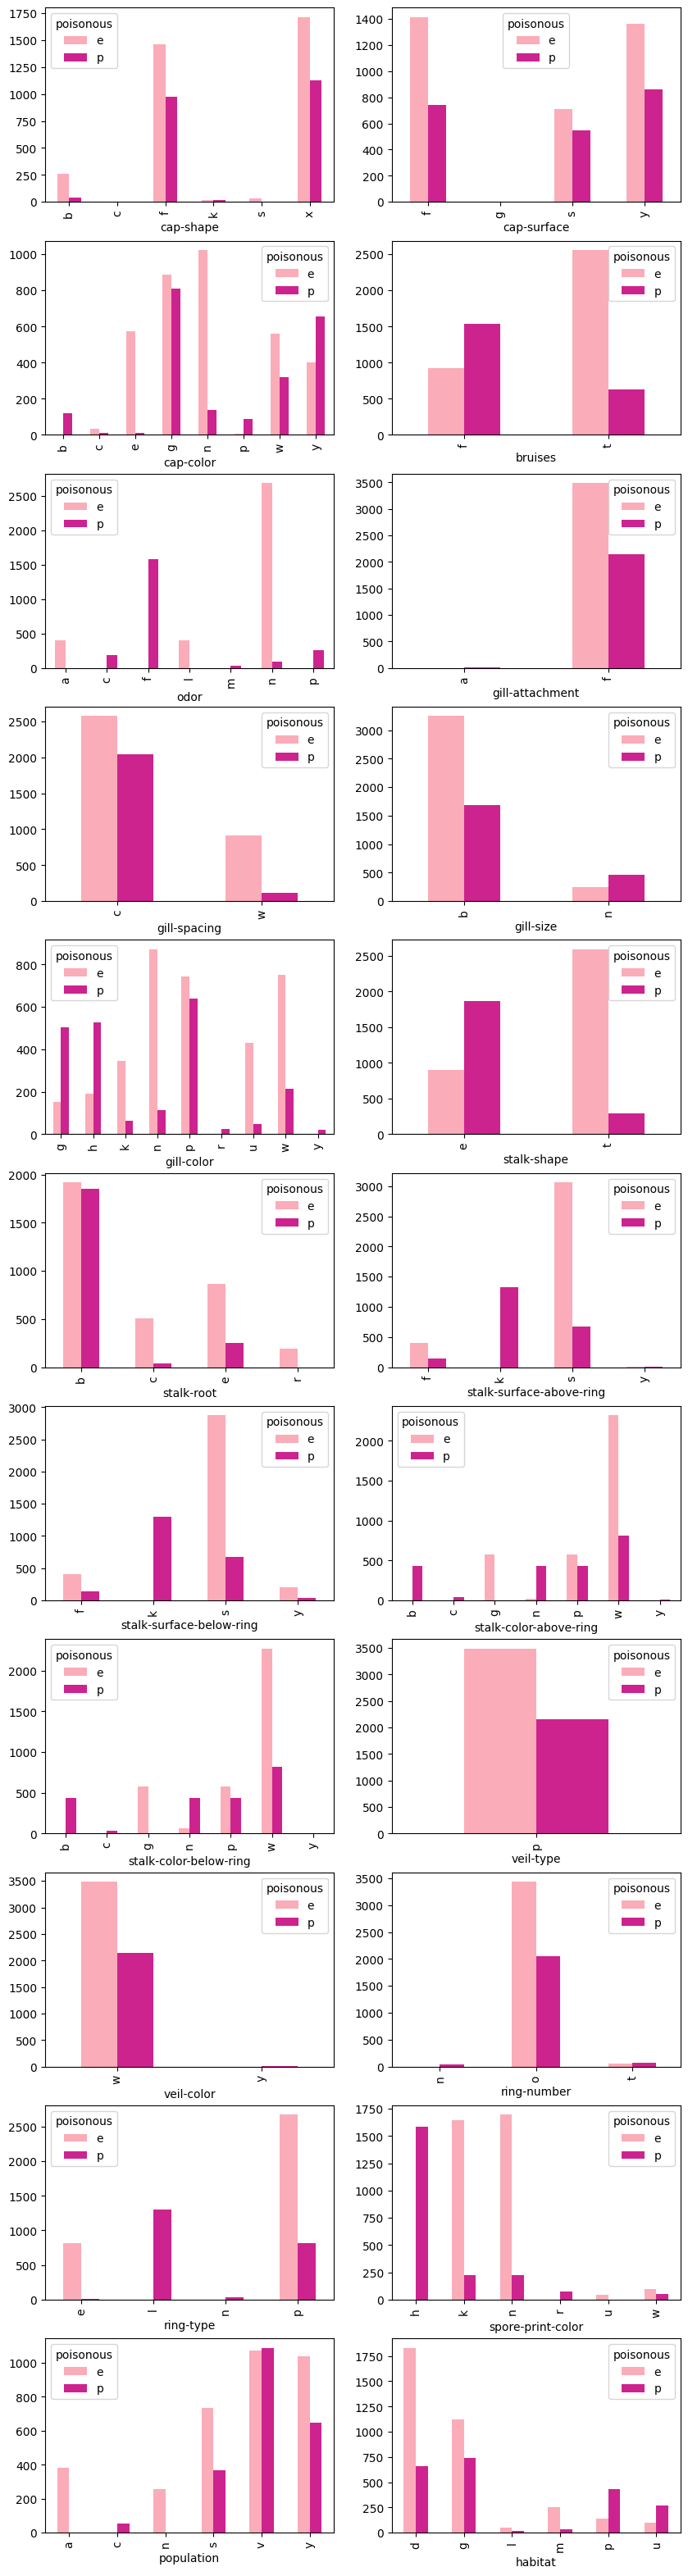

In [27]:
"""
    Через цикл пробегаемся по каждому столбцу датасета и, используя groypby, высчитываем количество данного значения признака по каждому классу.
    Создаем таблицу с данными частотами, где столбцы переименованы таким образом: признак + значение признака
    
"""
df_mushroom_f = pd.DataFrame()
columns = list(df_mushroom.drop('poisonous', axis = 1))
fig, axes = plt.subplots(11, 2, figsize=(10, 40))
for i, col in enumerate(columns):
    df_f = df_mushroom.groupby(col)['poisonous'].value_counts().unstack()
    df_f.plot.bar(ax=axes[i//2, i%2], color = sns.color_palette("RdPu", 2))
    df_f = df_f.rename(index=lambda x: df_f.index.name + '_' + x )
    df_mushroom_f =  pd.concat([df_mushroom_f, df_f])
plt.show()

### Таблица с частотами

In [28]:
df_mushroom_f.T.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u
poisonous,,,,,,,,,,,,,,,,,,,,,
e,260.0,NaN,1460.0,20.0,32.0,1716.0,1416.0,NaN,712.0,1360.0,...,256.0,736.0,1072.0,1040.0,1832.0,1120.0,48.0,256.0,136.0,96.0
p,40.0,4.0,972.0,16.0,NaN,1124.0,744.0,4.0,548.0,860.0,...,NaN,368.0,1088.0,648.0,660.0,740.0,16.0,36.0,432.0,272.0


# Задание №2

### Построить решающую функцию по каждой переменной на основе частот.

In [29]:
"""
    Для решения данной задачи используем таблицу частот из предыдущего пункта. 
    Идея решения состоит в том, что мы проходимся по каждому столбцу нашего датасета и только по нему делаем предсказание. Результат мы делаем на основе того, как часто 
    данное значение признака соответствует данному классу ( грубо говоря, где частота больше, следовательно, тот класс и ставим).
    
"""
rows = df_mushroom.shape[0]
Y = df_mushroom['poisonous']
acc = [[]]
for i, col in enumerate(columns):
    y_pred = []
    for r in range(rows):
        value = str(col) + '_' + str(df_mushroom.iloc[r][col])
        y_pred.append(df_mushroom_f.T[value].idxmax())
    acc[0].append(metrics.accuracy_score(Y, y_pred))
    print(col + ': '+ str('%.3f' % (acc[0][i] * 100)))


cap-shape: 61.871
cap-surface: 61.871
cap-color: 69.880
bruises: 72.502
odor: 98.441
gill-attachment: 62.119
gill-spacing: 61.800
gill-size: 65.769
gill-color: 74.805
stalk-shape: 79.022
stalk-root: 61.800
stalk-surface-above-ring: 85.400
stalk-surface-below-ring: 84.763
stalk-color-above-ring: 77.605
stalk-color-below-ring: 76.754
veil-type: 61.800
veil-color: 61.942
ring-number: 62.863
ring-type: 85.400
spore-print-color: 91.141
population: 63.005
habitat: 70.163


### Найти наиболее информативную переменную (с минимальным числом ошибок).


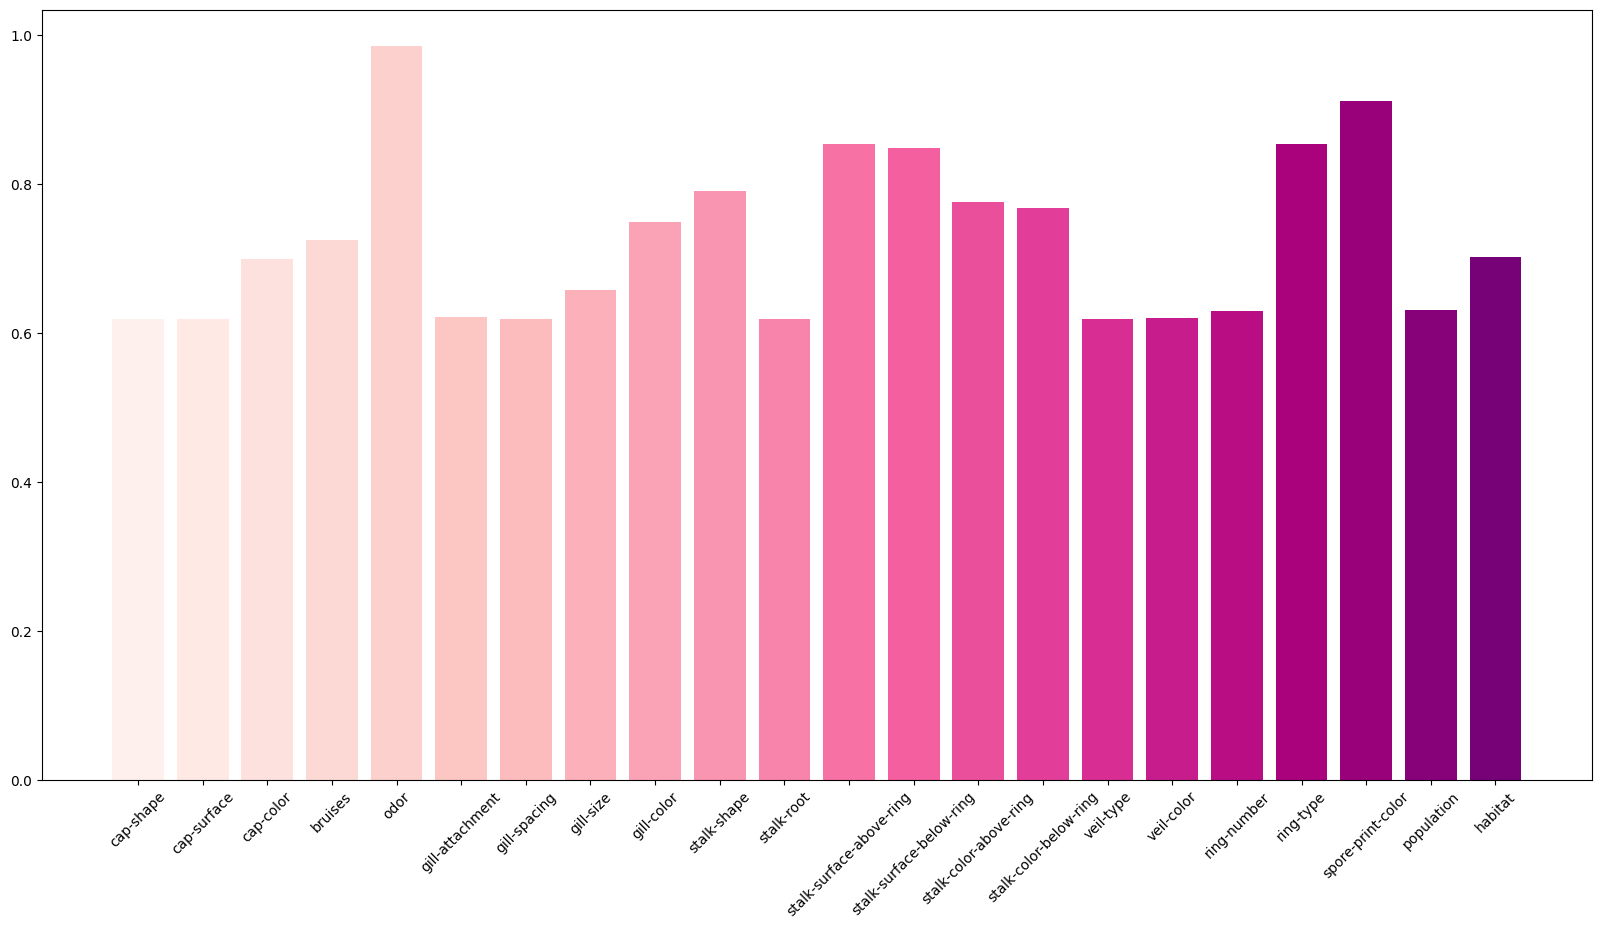

In [30]:
""" 
    Визуализируем наши оценки предсказания для каждого признака.
    
"""
df_acc = pd.DataFrame(acc, columns=columns)
fig, _ = plt.subplots(figsize=(20, 10))

plt.bar(list(df_acc), acc[0], color = sns.color_palette("RdPu", 24))
plt.xticks(rotation=45)
plt.show()

# Задание №3

###  Построить «наивный» байесовский классификатор из sklearn.

In [31]:
""" 
    Можем ли мы работать с качественными признаками? Да, можем, если приведем их к численному виду, а точнее в one-hot. Классы мы просто номеруем: котик - 0, собачка - 1.
    
"""
labelencoder=LabelEncoder()
df_mushroom['poisonous'] = labelencoder.fit_transform(df_mushroom['poisonous'])
df_mushroom = df_mushroom.rename(columns={'poisonous':'target'})
    
df_mushroom

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,target
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,1
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,0
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,0
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,1
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,b,y,n,f,n,f,c,b,w,e,...,n,n,p,w,t,p,w,y,p,0
8001,x,y,n,f,n,f,c,b,w,e,...,n,n,p,w,t,p,w,y,p,0
8038,x,y,g,t,n,f,c,b,w,e,...,w,w,p,w,t,p,w,y,p,0
8095,x,y,c,f,m,f,c,b,y,e,...,c,c,p,w,n,n,w,c,d,1


In [32]:
X = pd.get_dummies(df_mushroom.drop(['target'], axis=1))
y = df_mushroom['target']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
X

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u
0,False,False,False,False,False,True,False,False,True,False,...,False,True,False,False,False,False,False,False,False,True
1,False,False,False,False,False,True,False,False,True,False,...,True,False,False,False,False,True,False,False,False,False
2,True,False,False,False,False,False,False,False,True,False,...,True,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,True,False,False,False,True,...,False,True,False,False,False,False,False,False,False,True
4,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,True,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,True,False
8001,False,False,False,False,False,True,False,False,False,True,...,False,False,False,True,False,False,False,False,True,False
8038,False,False,False,False,False,True,False,False,False,True,...,False,False,False,True,False,False,False,False,True,False
8095,False,False,False,False,False,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False


In [33]:
""" 
    Используем встроенный наивный байесовский классификатор.
    
"""
model = GaussianNB()
y_pred = model.fit(x_train, y_train)

c:\Users\Sofia\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


In [34]:
""" 
    Для оценки качества модели рассчитываем матрицу ошибок и просматриваем метрики.
    
"""
y_pred = model.predict(x_test)
confusion_mat = metrics.confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_mat.ravel()
tn, fp, fn, tp 

c:\Users\Sofia\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


(1162, 4, 0, 697)

### Точность

In [35]:
sk_acc = metrics.accuracy_score(y_test, y_pred)
print('Train Accuracy', metrics.accuracy_score(y_train, model.predict(x_train)))
print('Test Accuracy',sk_acc)

Train Accuracy 0.9978841576302565
Test Accuracy 0.9978529253891573


c:\Users\Sofia\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


### Полнота

In [36]:
sk_prec = metrics.precision_score(y_test, y_pred)
print('Train Precision', metrics.precision_score(y_train, model.predict(x_train)))
print('Test Precision', sk_prec)

Train Precision 0.994546693933197
Test Precision 0.9942938659058488


c:\Users\Sofia\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


### Специфичность

In [37]:
sk_rec = metrics.recall_score(y_test, y_pred)
print('Train Recall', metrics.recall_score(y_train, model.predict(x_train)))
print('Test Recall', sk_rec)

Train Recall 1.0
Test Recall 1.0


c:\Users\Sofia\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


### F1 - score

In [38]:
sk_f = metrics.f1_score(y_test, y_pred)
print('Train f1_score', metrics.f1_score(y_train, model.predict(x_train)))
print('Test f1_score', sk_f)

Train f1_score 0.9972658920027342
Test f1_score 0.9971387696709586


c:\Users\Sofia\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


# Задание №4

### Самостоятельно реализовать метод, не используя готовый.

In [39]:
def my_NB(X_train, y_train, x_test):
    """
        Реализация наивного байесовского классификатора.

        Параметры:
        ---------
        X_train - обучающая выборка
        y_train - результат для обучающей выборки 
        x_test - тестовая выборка

        Выходные данные:
        ---------------
        Массив предсказанных классов для тестовой выборки.

    """

    # Для начала определяем все возможные классы для нашего датасета
    classes = sorted(np.unique(y_train))
    
    # Высчитываем размер обучающей выборки
    total_points = y_train.shape[0]
    
    # Расчитываем априорную вероятность для каждого класса 
    p_classes = np.zeros(len(classes))

    for label in classes:
        class_points = np.sum(y_train == label)
        p_classes[label] = class_points / float(total_points)

    # Расчитываем апостериорную вероятность
    features = list(X_train.columns) # Признаки
    rows = x_test.shape[0] # Количество тестовой выборки
    res = np.zeros(rows) # Результат
    for r in range(rows):
        post_probs = np.zeros(len(classes))

        for label in classes:

            likelihood = np.log10(p_classes[label])
            X_filtered = X_train[y_train == label]
            denominator = np.sum(y_train == label)
            
            for f in features:
                numerator = np.sum(X_filtered[f] == x_test.iloc[r][f])
                cond = numerator / float(denominator)
                likelihood += np.log10(cond)
            
            post_probs[label] = likelihood
            
        prediction = np.argmax(post_probs)
        res[r] = prediction
    return res

y_pred_ = my_NB(x_train, y_train, x_test)

C:\Users\Sofia\AppData\Local\Temp\ipykernel_7124\3019776268.py:46: RuntimeWarning: divide by zero encountered in log10
  likelihood += np.log10(cond)


### Точность

In [40]:
acc = metrics.accuracy_score(y_test, y_pred_)
print('Test Accuracy (sklearn)',sk_acc)
print('Test Accuracy',acc)


Test Accuracy (sklearn) 0.9978529253891573
Test Accuracy 0.998389694041868


### Полнота

In [41]:
prec = metrics.precision_score(y_test, y_pred_)
print('Test Precision (sklearn)',sk_prec)
print('Test Precision', prec)

Test Precision (sklearn) 0.9942938659058488
Test Precision 0.9957142857142857


### Специфичность

In [42]:
rec = metrics.recall_score(y_test, y_pred_)
print('Test Recall (sklearn)',sk_rec)
print('Test Recall', rec)

Test Recall (sklearn) 1.0
Test Recall 1.0


### F1 - score

In [43]:
f = metrics.f1_score(y_test, y_pred_)
print('Test f1_score (sklearn)',sk_f)
print('Test f1_score', f)

Test f1_score (sklearn) 0.9971387696709586
Test f1_score 0.9978525411596278


### F1 - score

In [44]:
sk_f = metrics.f1_score(y_test, y_pred)
print('Train f1_score', metrics.f1_score(y_train, model.predict(x_train)))
print('Test f1_score', metrics.f1_score(y_test, y_pred))

Train f1_score 0.9972658920027342
Test f1_score 0.9971387696709586


c:\Users\Sofia\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


# Задание №5

### Применить метод логистической регрессии, использовав в качестве переменных оценки вероятностей, подвергнутые обратному логистическому преобразованию.

In [45]:
mushroom = fetch_ucirepo(id=73) 
  
X = mushroom.data.features 
Y = mushroom.data.targets 

df_mushroom = pd.DataFrame(X.join(Y))
CLASSES = list(df_mushroom['poisonous'].unique())
df_mushroom = df_mushroom.dropna()
df_mushroom

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,b,y,n,f,n,f,c,b,w,e,...,n,n,p,w,t,p,w,y,p,e
8001,x,y,n,f,n,f,c,b,w,e,...,n,n,p,w,t,p,w,y,p,e
8038,x,y,g,t,n,f,c,b,w,e,...,w,w,p,w,t,p,w,y,p,e
8095,x,y,c,f,m,f,c,b,y,e,...,c,c,p,w,n,n,w,c,d,p


In [46]:
columns = list(df_mushroom.drop('poisonous', axis = 1))
columns


['cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [47]:
""" 
    Как и в первом задании, высчитываем вероятность для каждого занчения признака. Затем вычисляем априорную вероятность для класса 'p' для данного значения призанка, 
    пропускаем наши вероятности через сигмоиду (это и есть обратное логистическое преобразование) и определяем наш класс через пороговое значени 0.5( больше, значит класс 'p',
    иначе 'e'). Далее оцениваем точность данного решения по каждому признаку отдельно.
    
"""
acc_log = [[]]
for col in columns: 
    features = df_mushroom.groupby(col)['poisonous'].value_counts().unstack() 
    features['Probabilities'] = features['p'] / (features['p'] + features['e']) 
    probs = np.array(df_mushroom[col].map(lambda x: features.at[x,'Probabilities']).values)
    sigmoid = 1 / (1 + np.exp(-probs))    
    res = ['p' if x >= 0.5 else 'e' for x in sigmoid]  
    accuracy = metrics.accuracy_score(df_mushroom['poisonous'], res)
    acc_log[0].append(accuracy)
    print(col + ' : ' + str('%.3f' % (accuracy * 100)))
    

cap-shape : 38.696
cap-surface : 38.129
cap-color : 36.074
bruises : 38.200
odor : 15.734
gill-attachment : 37.881
gill-spacing : 38.200
gill-size : 38.200
gill-color : 37.385
stalk-shape : 38.200
stalk-root : 41.602
stalk-surface-above-ring : 14.600
stalk-surface-below-ring : 15.237
stalk-color-above-ring : 39.972
stalk-color-below-ring : 39.972
veil-type : 38.200
veil-color : 38.058
ring-number : 37.562
ring-type : 14.600
spore-print-color : 9.709
population : 48.618
habitat : 38.200


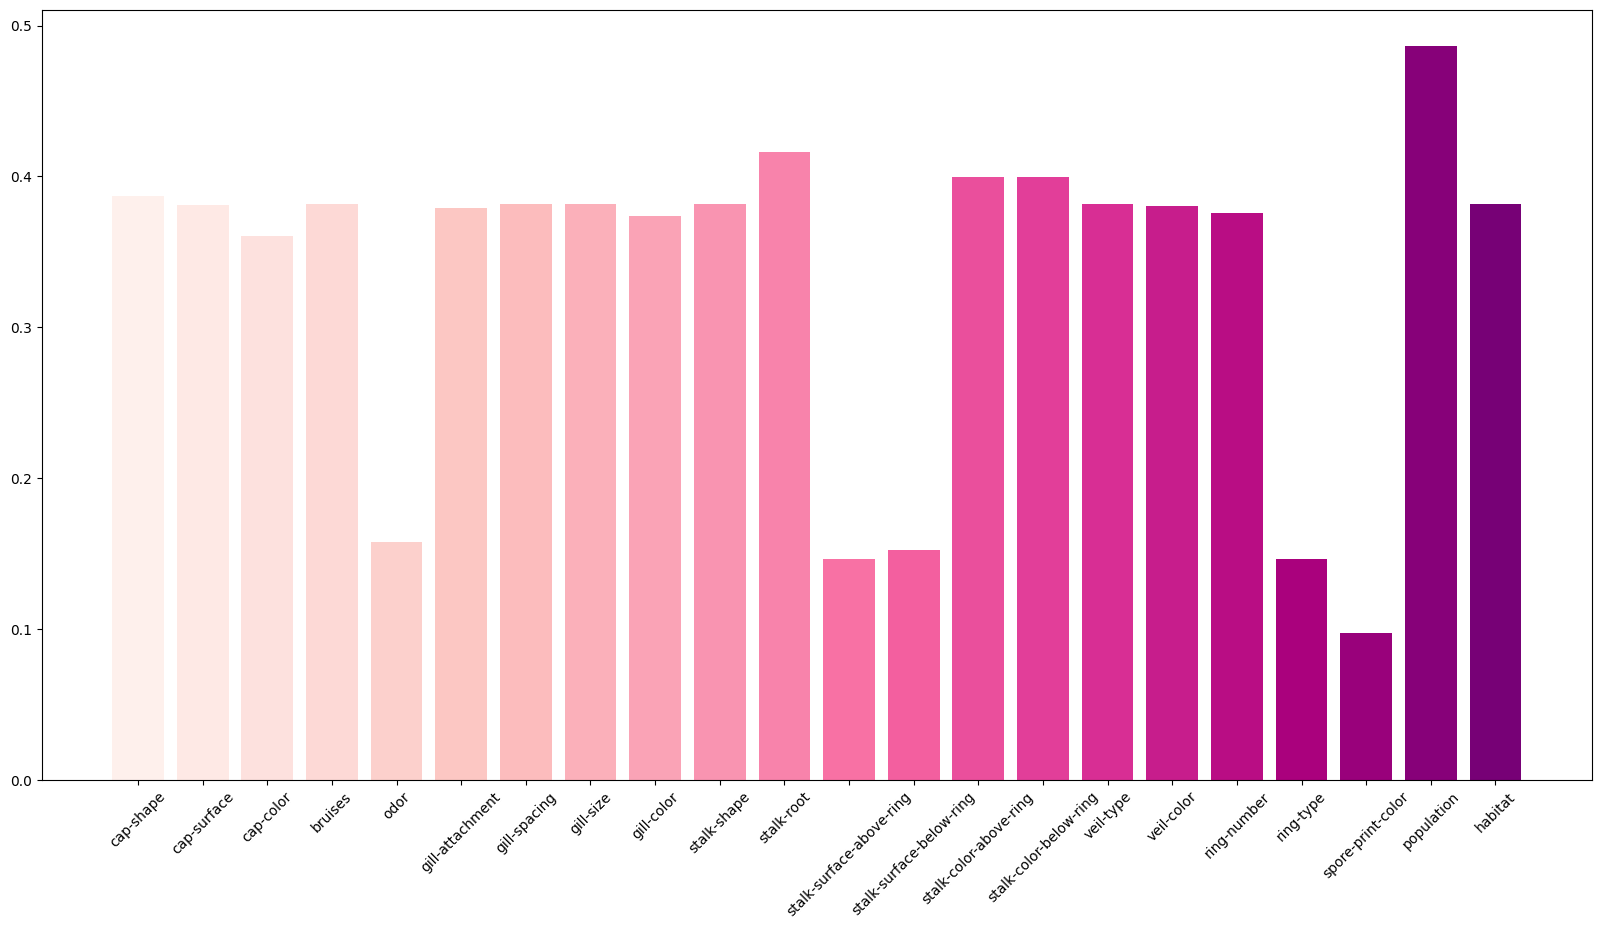

In [48]:
""" 
    Визуализируем предыдущее решение.
    
"""
df_acc = pd.DataFrame(acc_log, columns=columns)
fig, _ = plt.subplots(figsize=(20, 10))
plt.bar(list(df_acc), np.array(acc_log[0]), color = sns.color_palette("RdPu", 24))
plt.xticks(rotation=45)
plt.show()